In [183]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [184]:
movies = pd.read_csv("the-movies-dataset/movies_metadata.csv")
ratings = pd.read_csv("the-movies-dataset/ratings_small.csv")

Najpre analizirajmo skup podataka *movies*.

In [186]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [187]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

Eliminišemo duplikate.

In [208]:
movies.drop_duplicates(inplace=True)

Pravimo listu *top_rated* koja sadrži najbolje ocenjene filmove, prema sistemu ocenjivanja koji koristi IMDB. Računamo otežanu ocenu za svaki film prema formuli
$ \frac{v}{v+m} * R + \frac{m}{v+m}*C$, gde je $R$ prosečna ocena filma (atribut *vote_average*), $v$ broj glasova za film (atribut *vote_count*), $m$ minimalan broj glasova neophodan da bi se film našao na *top_rated* listi (postavljamo $m$ na 90. percentil od $v$, što iznosi negde oko 160) i $C$ je srednja ocena uzeta po svim dostupnim filmovima. Prikazujemo 10 najpopularnijih filmova po ovom kriterijumu.

In [189]:
m = movies.vote_count.quantile(0.9)
C = movies.vote_average.mean()
qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) 
                   & (movies['vote_average'].notnull())]

v = qualified.vote_count
R = qualified.vote_average
weighted_score = (v/(v+m)*R) + (m/(v+m)*C)
weighted_score = round(weighted_score, 6)

movie_title = qualified.title

top_rated = np.vstack([movie_title,R,v,weighted_score]).T
top_rated = pd.DataFrame(top_rated,columns = ['Movie Title','Avg Votes','Num Votes','Weighted Score'])
top_rated = top_rated.sort_values('Weighted Score',ascending=False)
top_rated.head(10)

,Movie Title,Avg Votes,Num Votes,Weighted Score
101,The Shawshank Redemption,8.5,8358,8.44587
230,The Godfather,8.5,6024,8.42544
1965,Dilwale Dulhania Le Jayenge,9.1,661,8.42145
2397,The Dark Knight,8.3,12269,8.26548
916,Fight Club,8.3,9678,8.25638
91,Pulp Fiction,8.3,8670,8.25141
168,Schindler's List,8.3,4436,8.20664
3736,Whiplash,8.3,4376,8.2054
1437,Spirited Away,8.3,3968,8.19605
726,Life Is Beautiful,8.3,3643,8.18717


Pogledajmo još neke moguće pravce analize. Na primer, izdvojimo godinu izlaska filma u posebnu kolonu *year*, a zatim grafički prikažemo broj filmova po godini.

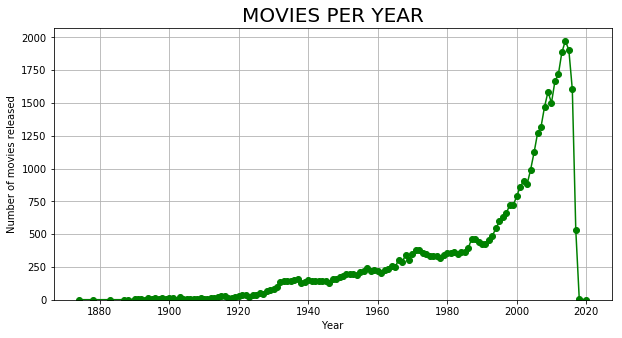

In [214]:
movies['year'] = movies.release_date.str.extract("(\d{4})", expand = True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year
dftmp = movies[['id', 'year']].groupby('year')
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.id.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('MOVIES PER YEAR',fontsize=20)
plt.show()

Sada preuređujemo kolonu koja se odnosi na žanrove *genres* da zapis bude pogodniji, a zatim ćemo grafički prikazati broj filmova po žanrovima za 10 najzastupljenijih žanrova.

In [216]:
import ast
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

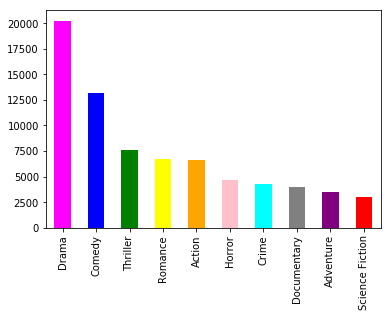

In [265]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

genres_count = pd.Series(counting_values(movies, 'genres'))
colors = ['magenta','blue','green','yellow','orange','pink','aqua','gray','purple','red']
genres_count.sort_values(ascending = False).head(10).plot(kind = 'bar',color = colors)
plt.show()

Prikažimo 10 filmova sa najvećim brojem glasova.

In [275]:
movies.sort_values(by='vote_count', ascending=False)[['title','vote_count']].head(10)

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


Analizirajmo sada drugi skup podataka, *ratings*.

In [263]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [264]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Prikazujemo prosečnu ocenu u datom skupu podatka.

In [292]:
ratings['rating'].mean()

3.543608255669773

Prikazujemo broj ocena po korisniku.

In [326]:
rat = ratings.sort_values(by = 'userId').groupby('userId').count()
rat['number of votes'] = rat['movieId']
rat = rat.drop(columns = ['rating','timestamp','movieId'])
rat.head(10)

,number of votes
userId,
1,20
2,76
3,51
4,204
5,100
6,44
7,88
8,116
9,45
